# 基于轮廓系数选择n_clusters

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm # colormap
import numpy as np
from sklearn.datasets import make_blobs

In [3]:
x, y = make_blobs(n_samples=500, n_features=2, centers=4, random_state=1)

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262


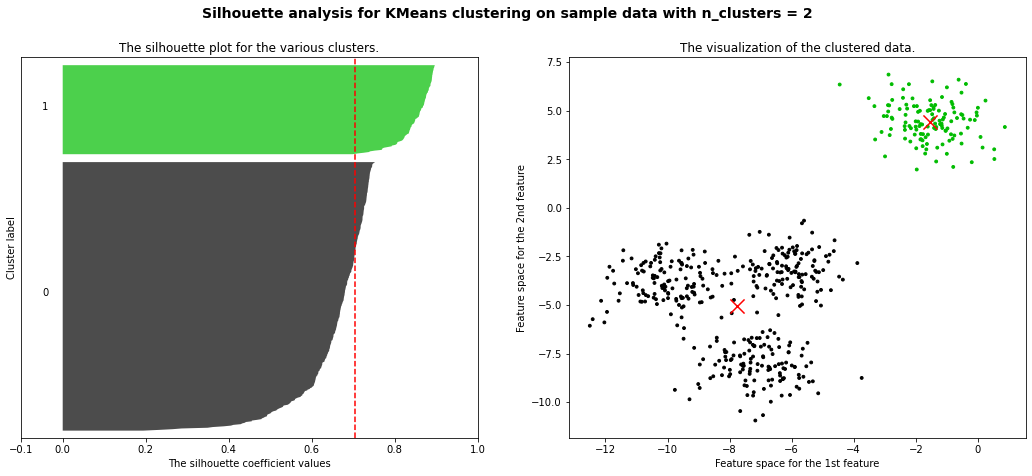

For n_clusters = 3 The average silhouette_score is : 0.5882004012129721


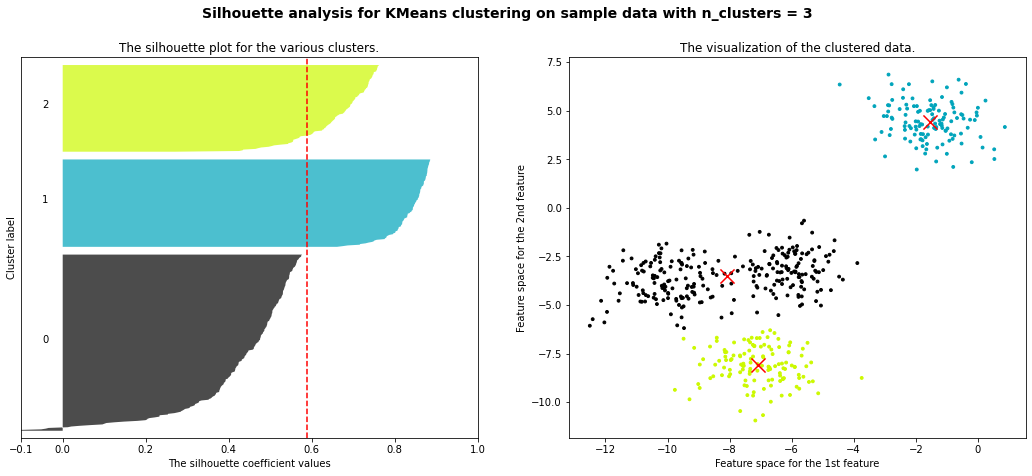

For n_clusters = 4 The average silhouette_score is : 0.6505186632729437


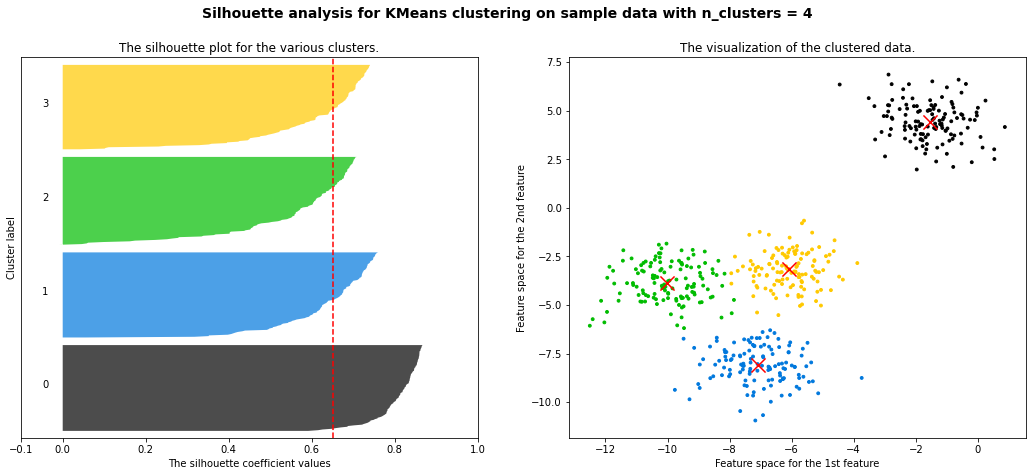

For n_clusters = 5 The average silhouette_score is : 0.5745566973301872


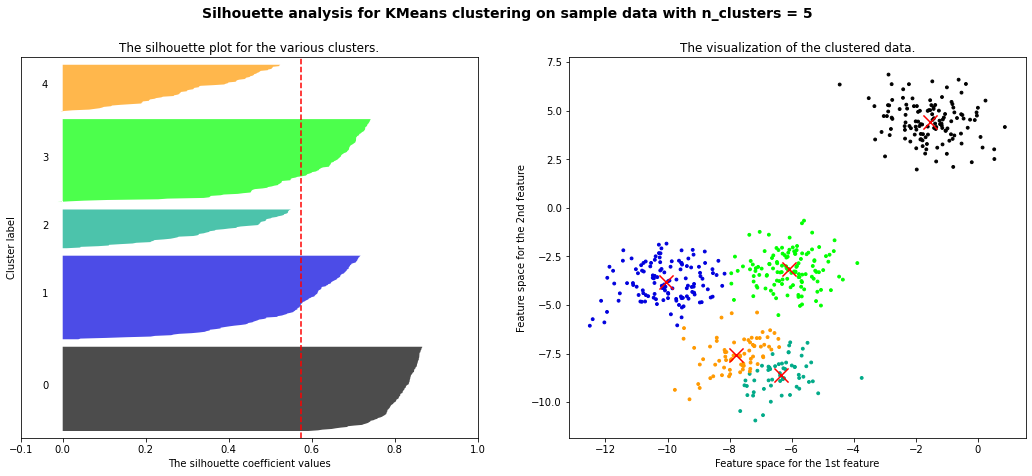

For n_clusters = 6 The average silhouette_score is : 0.4387644975296138


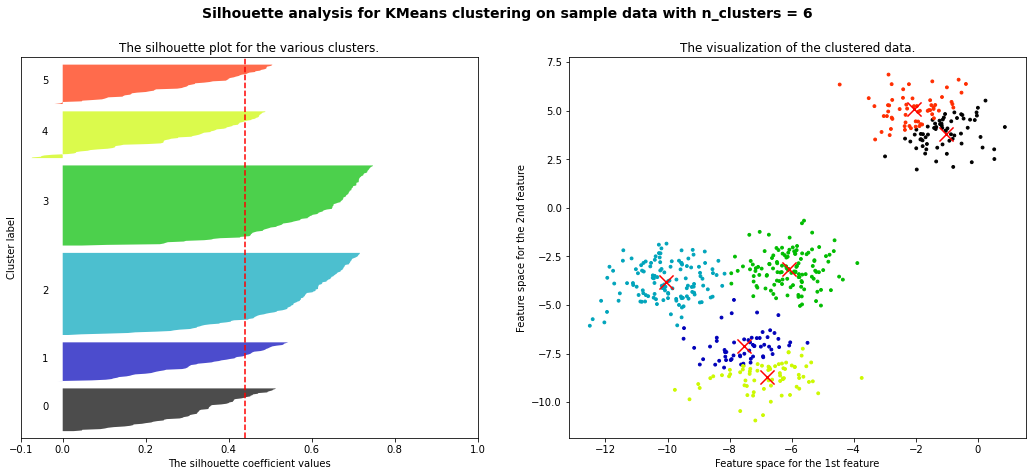

For n_clusters = 7 The average silhouette_score is : 0.3728615111052894


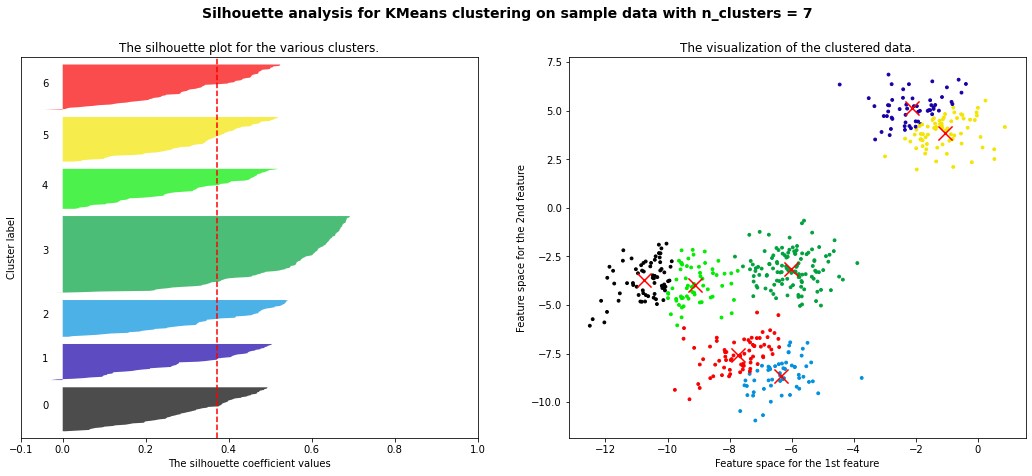

In [5]:
for n_clusters in [2,3,4,5,6,7]:
    n_clusters = n_clusters
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, x.shape[0] + (n_clusters + 1) * 10])
    
    clusterer = KMeans(n_clusters=n_clusters, random_state=10).fit(x)
    cluster_labels = clusterer.labels_
    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)
    
    y_lower = 10
    for i in range(n_clusters):
        sample_silhouette_values = silhouette_samples(x, cluster_labels)
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i)/n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper)
                        ,ith_cluster_silhouette_values
                        ,facecolor=color
                        ,alpha=0.7
                        )
        ax1.text(-0.05
                , y_lower + 0.5 * size_cluster_i
                , str(i))
        y_lower = y_upper + 10
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(x[:, 0], x[:, 1]
                ,marker='o'
                ,s=8
                ,c=colors
                )
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='x',c="red", alpha=1, s=200)
    
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data ""with n_clusters = %d" % n_clusters),fontsize=14, fontweight='bold')
    plt.show()

# 初始质心选择

- init:可输入"k-means++","random"或者一个n维数组。这是初始化质心的方法,默认"k-means++"。输入"k-means++":一种为K均值聚类选择初始聚类中心的聪明的办法,以加速收敛。如果输入了n维数组,数组的形状应该是(n_clusters,n_features)并给出初始质心。
- random_state:控制每次质心随机初始化的随机数种子
- n_init:整数,默认10,使用不同的质心随机初始化的种子来运行k-means算法的次数。最终结果会是基于Inertia来计算的n_init次连续运行后的最佳输出

In [8]:
plus = KMeans(n_clusters=10).fit(x)
plus.n_iter_

15

# 迭代次数
- max_iter:整数,默认300,单次运行的k-means算法的最大迭代次数
- tol:浮点数,默认1e-4,两次迭代间Inertia下降的量,如果两次迭代之间Inertia下降的值小于tol所设定的值,迭代就会停下

In [11]:
random = KMeans(n_clusters = 10,init="random",max_iter=10,random_state=420).fit(x)
y_pred_max10 = random.labels_
silhouette_score(x,y_pred_max10)

0.3266869793678966

In [13]:
random = KMeans(n_clusters = 10,init="random",max_iter=50,random_state=420).fit(x)
y_pred_max20 = random.labels_
silhouette_score(x,y_pred_max20)

0.3266869793678966